In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

In [2]:
def binary_to_3dbox(file):
    f_21cm = open(file,"rb")
    binary_21cm = f_21cm.read()
    np_float_array_21cm = np.fromstring(binary_21cm, np.float32)
    f_21cm.close()
    
    # return one slice
    return np.reshape(np_float_array_21cm, (200,200,200))

In [9]:
# returns list of filenames in mypath
def filenames_in(mypath="./joelle_batch_2.1/joelle_ESC_FRAC_0.070_RNG_150/"):
    filenames = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath,f))]
    return filenames


In [10]:
# returns the file who's name includes the string includes
def get_bin21(filename_includes, category_includes="delta_T" ,mypath=None):
    if mypath: filenames = filenames_in(mypath)
    else: filenames = filenames_in() # use the default
    category = [i for i in fnames if category_includes in i]
    print("there are ",len(category),"files in the category :) ")#trace
    filename = [i for i in category if filename_includes in i]
    if len(filename)!=1: raise Exception("Error the number of files that match your description is not 1\nit is "+str(len(filename)))
    
    
    return filename[0]
    

In [11]:
# import the categories manually
fnames = filenames_in(mypath="./joelle_batch_2.1/joelle_ESC_FRAC_0.070_RNG_150/")

delta_fnames = [i for i in fnames if i[:5]=="delta"]
gamma_fnames = [i for i in fnames if i[:5]=="Gamma"]
nrec_fnames = [i for i in fnames if i[:4]=="Nrec"]
smoothed_fnames = [i for i in fnames if "smoothed" in i]
vx_fnames = [i for i in fnames if "_vx_" in i]
vy_fnames = [i for i in fnames if "_vy_" in i]
vz_fnames = [i for i in fnames if "_vz_" in i]
xh_nohalos_fnames = [i for i in fnames if "xH_nohalos" in i]
z_first_ionization_fnames = [i for i in fnames if "z_first"==i[:7]]

fname_sublist =[delta_fnames , gamma_fnames, nrec_fnames, smoothed_fnames, 
                vx_fnames,vy_fnames,vz_fnames,xh_nohalos_fnames,
                z_first_ionization_fnames]

In [12]:
# check that there are no filenames that are not in one of the sublists
fname_copy = fnames[:]
sublist_copy = fname_sublist[:]
print("len fname_copy before",len(fname_copy))
for sublist in sublist_copy:
    for j in sublist:
        fname_copy.remove(j)
print("len fname_copy after",len(fname_copy))
if len(fname_copy)==0:print("good, all the filenames are included in a category")
else:print("Warning not all filenames are included in a category")

len fname_copy before 155
len fname_copy after 0
good, all the filenames are included in a category


In [13]:
# check that each category is non-empty
for sublist in sublist_copy:
    if len(sublist)==0: print("the category",namestr(sublist)," is empty")# prints the variable name

## Looking at the data visually
The aim is broad, by and large I want to see what sort of data is in each type or category of file that I defined above. Also I wanna try to find which files are the ones that contain the density fields. I think they are the ones called updated smoothed data x (from my notes of my meeting with Prof. Adrien Liu)

In [18]:
def display_random_slices(filename_includes=".041347" , category_includes="delta_T",save_as=None):
    # get some filename
    mypath="./joelle_batch_2.1/joelle_ESC_FRAC_0.070_RNG_150/"
    fname = get_bin21(filename_includes=filename_includes,category_includes=category_includes,mypath=mypath)


    # import and display the data of fname
    data = binary_to_3dbox(mypath+fname)
    print(data.shape)#trace

    # display random slices of the data
    plt.figure(figsize=(14,7))
    for i in range(3*2):
        plt.subplot(2,3,i+1)
        plt.imshow(random.choice(data),cmap=cm.plasma)

    if save_as: plt.savefig(save_as)
    plt.show()


Does the data need to be normalised for the color map to work well?

there are  17 files in the category :) 
there are  17 files in the category :) 
(200, 200, 200)


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


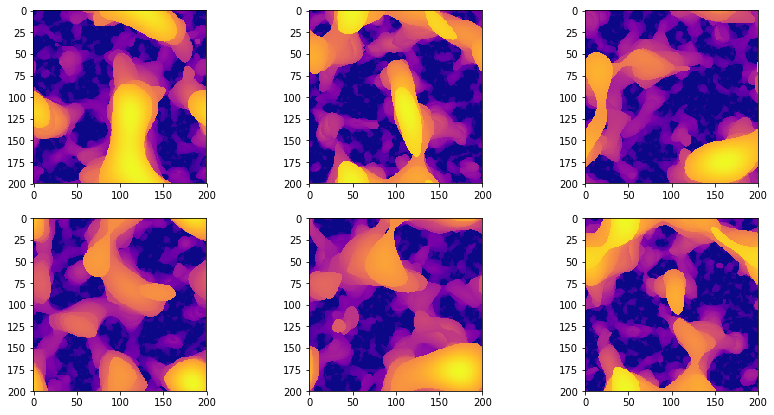

In [19]:
mypath="./joelle_batch_2.1/joelle_ESC_FRAC_0.070_RNG_150/"
fname = get_bin21(filename_includes="z006.00" , category_includes="Gamma12")

display_random_slices(filename_includes="z006.00", category_includes="Gamma12")
data = binary_to_3dbox(mypath+fname)

there are  17 files in the category :) 
(200, 200, 200)


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


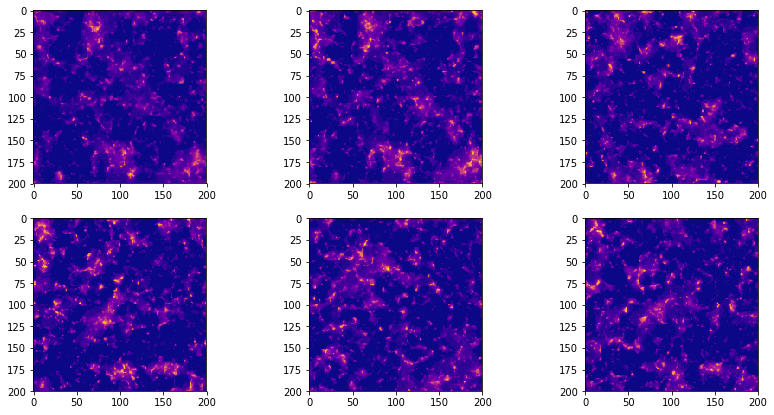

In [21]:
display_random_slices(filename_includes="z006.5" , category_includes="Nrec_z")

there are  18 files in the category :) 
(200, 200, 200)


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


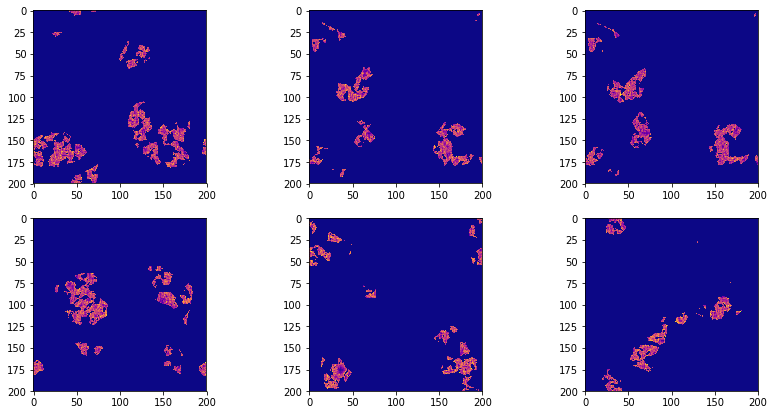

In [22]:
display_random_slices(filename_includes=".041347" , category_includes="delta_T")#,save_as="delta_T_sample.png")

there are  17 files in the category :) 
(200, 200, 200)


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


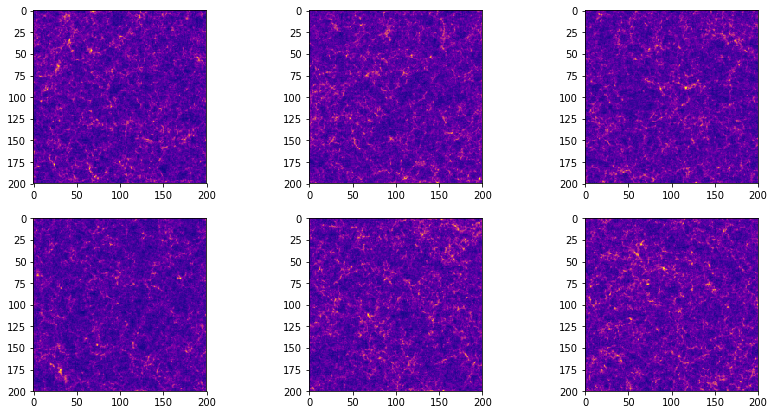

In [23]:
display_random_slices(filename_includes="z006.5" , category_includes="updated_smoothed_deltax")#,save_as="updated_smoothed_deltax_sample.png")

there are  17 files in the category :) 
(200, 200, 200)


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


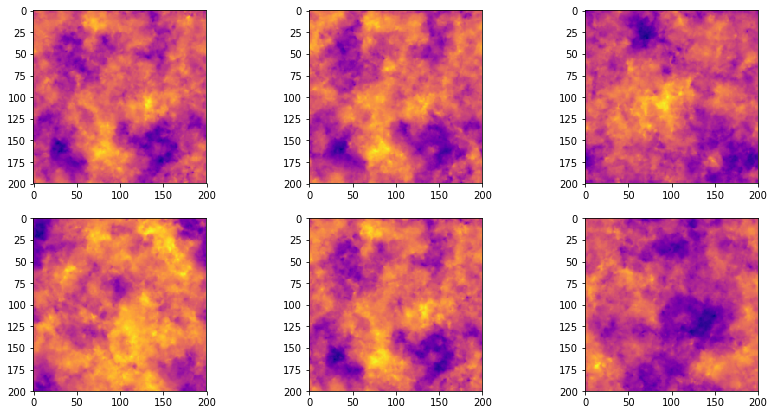

In [24]:
display_random_slices(filename_includes="z006.5" , category_includes="updated_vx")

there are  17 files in the category :) 
(200, 200, 200)


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


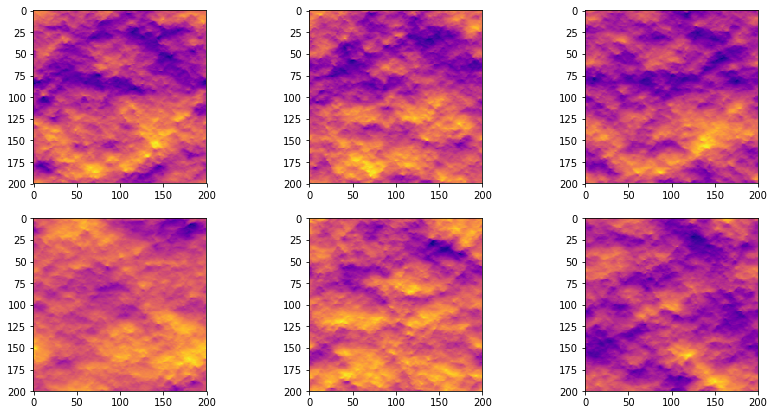

In [25]:
display_random_slices(filename_includes="z006.5" , category_includes="updated_vy")

there are  17 files in the category :) 
(200, 200, 200)


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


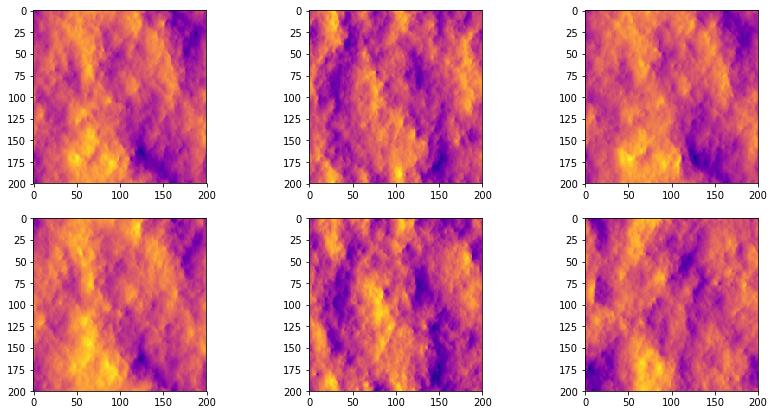

In [26]:
display_random_slices(filename_includes="z006.5" , category_includes="updated_vz")

there are  17 files in the category :) 
(200, 200, 200)


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


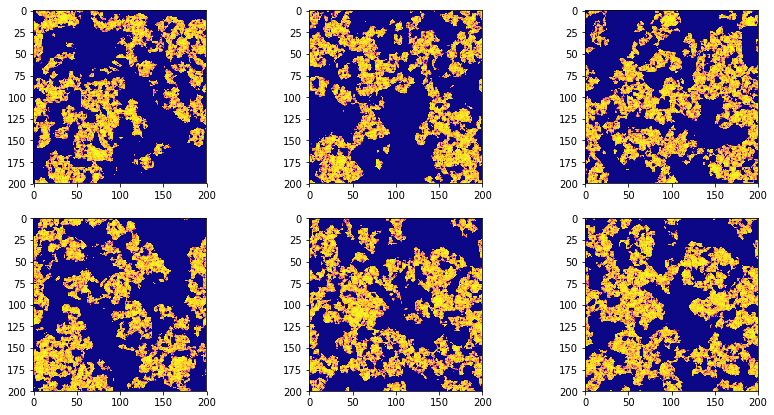

In [27]:
display_random_slices(filename_includes="z006.5" , category_includes="xH_nohalos")

there are  17 files in the category :) 
(200, 200, 200)


/home/steve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  after removing the cwd from sys.path.


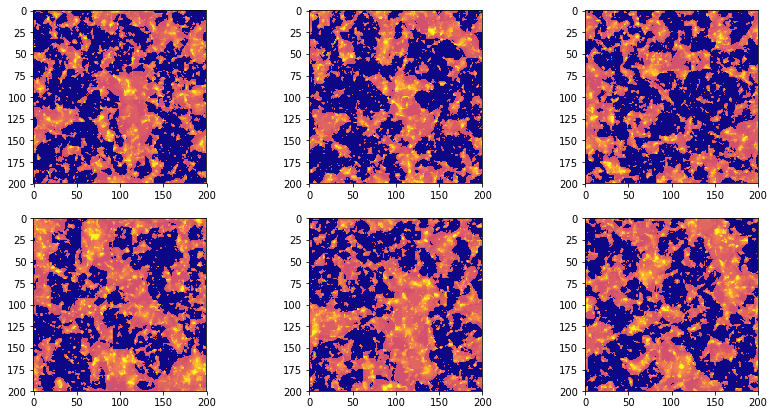

In [28]:
display_random_slices(filename_includes="z006.5" , category_includes="z_first_ionization")

## Playing with the binary file - figure out how the two types of file that I like look like
So the point 